Evaluating Model-1
Found 500 images belonging to 5 classes.
16/16 [==============================] - 1s 30ms/step - loss: 0.6025 - accuracy: 0.7660
Model-1 Test Accuracy: 0.7660
16/16 [==============================] - 1s 31ms/step


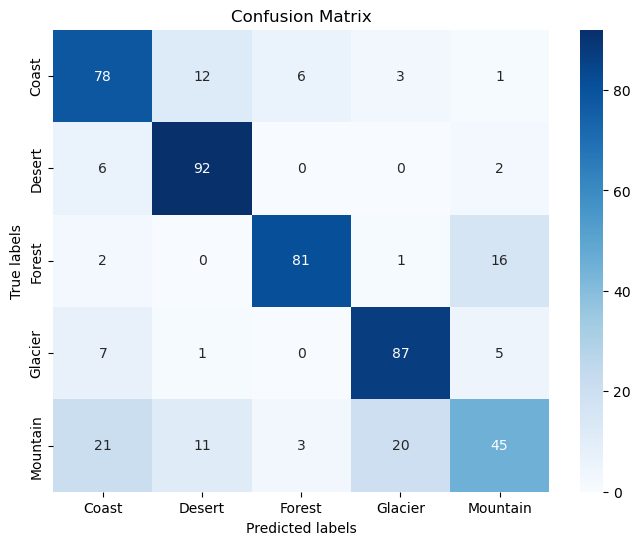

Evaluating Model-2
Found 500 images belonging to 5 classes.
16/16 [==============================] - 1s 56ms/step - loss: 0.6016 - accuracy: 0.7680
Model-2 Test Accuracy: 0.7680
16/16 [==============================] - 1s 54ms/step


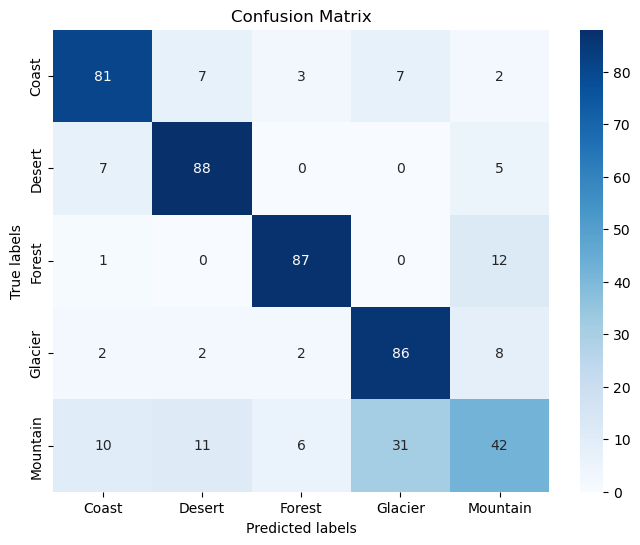

Evaluating Model-3


Found 500 images belonging to 5 classes.
16/16 [==============================] - 3s 160ms/step - loss: 0.4916 - accuracy: 0.8160
Model-3 Test Accuracy: 0.8160
16/16 [==============================] - 3s 163ms/step


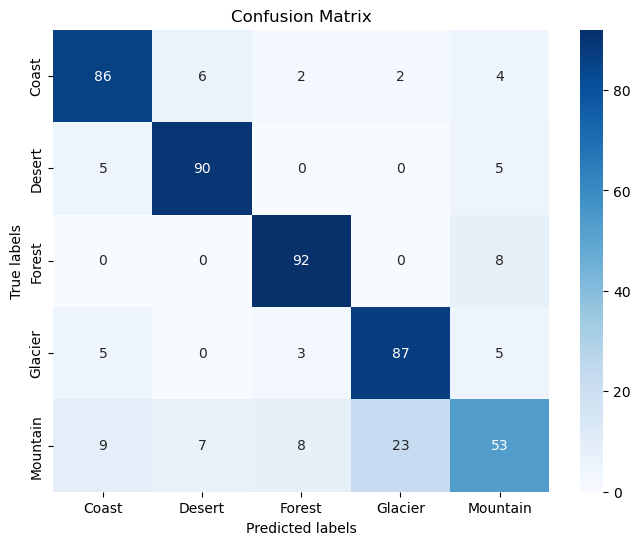

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Paths to the models (saved in the same directory as this file)
model_paths = ['Model-1.keras', 'Model-2.keras', 'Model-3.keras']

# Iterate through each model
for i, model_path in enumerate(model_paths, start=1):
    print(f"Evaluating Model-{i}")
    
    # Load the model
    model = load_model(model_path)

    # Load and preprocess the test data
    test_dir = 'Landscape Classification/Testing Data'  # Specify the path to the testing data
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    # Evaluating the model on the test data
    loss, accuracy = model.evaluate(test_generator)
    print(f"Model-{i} Test Accuracy: {accuracy:.4f}")
    
    # true labels and predictions
    y_true = test_generator.classes
    y_pred = np.argmax(model.predict(test_generator), axis=1)
    
    # class labels
    class_labels = list(test_generator.class_indices.keys())
    
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, class_labels)
